<a href="https://colab.research.google.com/github/elisalsr/Weather_classification/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import kagglehub
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers



# Data import and verification

100%|██████████| 2.34M/2.34M [00:00<00:00, 128MB/s]

Extracting files...
Chemin du dataset: /root/.cache/kagglehub/datasets/rogeriovaz/rome-weather-classification/versions/1


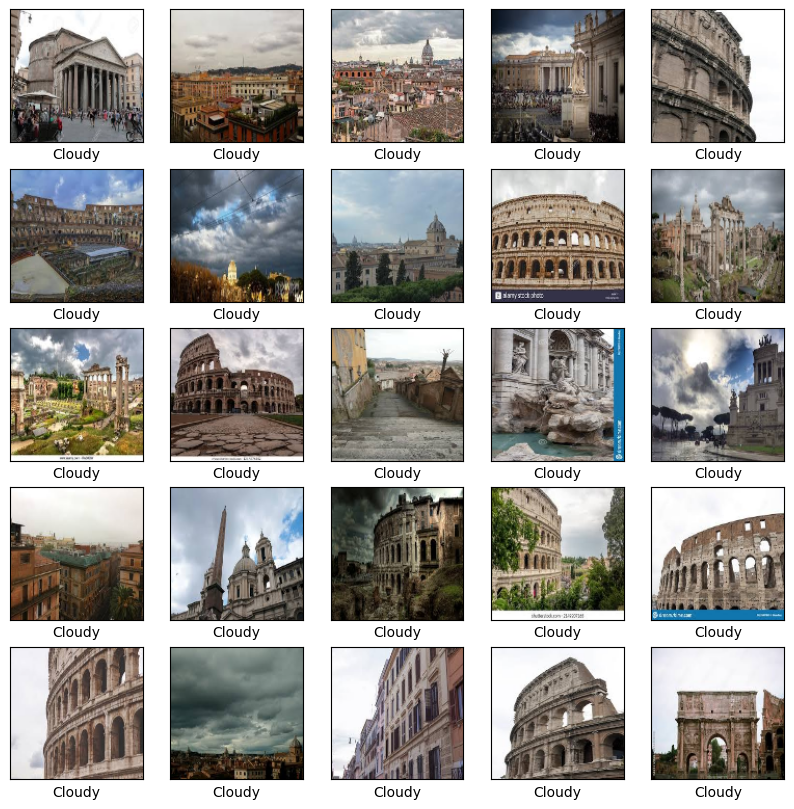

In [ ]:
# Download dataset
path = kagglehub.dataset_download("rogeriovaz/rome-weather-classification")

# Some useful variables
train_dir = os.path.join(path, "Rome Weather") # The folder with pictures
class_names = sorted(os.listdir(train_dir)) # Weather classes verification

# Pictures and labels
train_images = []
train_labels = []

# Size of pictures
IMG_SIZE = (128, 128)
# Note that the largest image is 435x285 and the average size is 269x189.
# 128 x 128 seems to be the best threshold : The model can be quite fast without losing too much information.

for label, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Our pictures are in RGB
            img = cv2.resize(img, IMG_SIZE)  # Resize of pictures
            train_images.append(img)
            train_labels.append(label)

# Conversion into a numpy table with correct formatting
train_images = np.array(train_images, dtype=np.uint8)  # Ensures a uniform format
train_labels = np.array(train_labels)

# Print pictures
num_images = min(25, len(train_images))
grid_size = int(np.sqrt(num_images))

plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(grid_size, grid_size, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_images[i])

    # We verify our labels
    plt.xlabel(class_names[train_labels[i]])

plt.show()

# CNN Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,749,253 (10.49 MB)

 Trainable params: 2,749,253 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.2311 - loss: 1.7199 - val_accuracy: 0.2400 - val_loss: 1.5821
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2053 - loss: 1.5781 - val_accuracy: 0.3600 - val_loss: 1.4257
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3733 - loss: 1.3740 - val_accuracy: 0.6133 - val_loss: 1.0879
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5152 - loss: 1.3197 - val_accuracy: 0.4400 - val_loss: 1.2174
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5278 - loss: 1.1034 - val_accuracy: 0.6133 - val_loss: 0.9333
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7042 - loss: 0.8618 - val_accuracy: 0.7200 - val_loss: 0.6987
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8103 - loss: 0.6228 - val_accuracy: 0.4533 - val_loss: 1.8294
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6012 - loss: 1.1484 - val_accuracy: 0.5733 - val_loss: 1.0776
Epoch 9/1

Validation Accuracy: 0.6800, Validation Loss: 0.8745


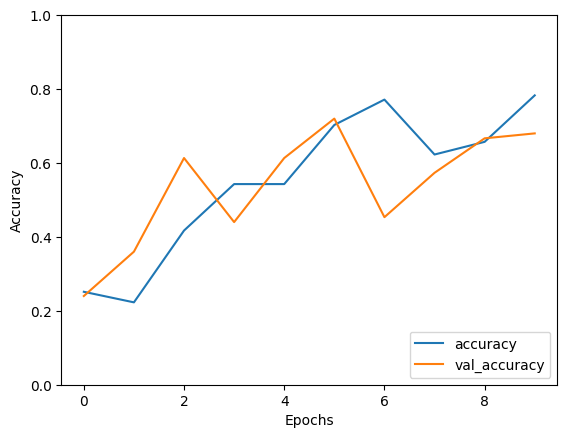

In [ ]:

# Download dataset
path = kagglehub.dataset_download("rogeriovaz/rome-weather-classification")

# Some useful variables
train_dir = os.path.join(path, "Rome Weather") # The folder with pictures
class_names = sorted(os.listdir(train_dir)) # Weather classes verification

# Pictures and labels
train_images = []
train_labels = []

# Size of pictures
IMG_SIZE = (128, 128)
# Note that the largest image is 435x285 and the average size is 269x189.
# 128 x 128 seems to be the best threshold : The model can be quite fast without losing too much information.

# Load pictures and labels
for label, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_path):
        continue

    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversion in RGB
            img = cv2.resize(img, IMG_SIZE)  # Resize of pictures (for a faster training)
            train_images.append(img)
            train_labels.append(label)

# Conversion into a numpy table with correct formatting
train_images = np.array(train_images, dtype=np.uint8)
train_labels = np.array(train_labels)

# We normalize pictures
train_images = train_images / 255.0

# Converting labels to one-hot encoding
train_labels = to_categorical(train_labels, len(class_names))

# Division into training and validation data
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

# Building the CNN model
model = models.Sequential()

# We chose 4 convolutional layers so that our model could analyse our images quite accurately with an acceptable training time.
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth convolutional layer
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten convolution layers to connect them to the dense layer
model.add(layers.Flatten())

# Dense layer
model.add(layers.Dense(256, activation='relu'))
# Adding a second dense layer was more time consumming without increasing accuracy.

# Output layer (softmax function for multi-class classification)
model.add(layers.Dense(len(class_names), activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Model evaluation on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

# Saving the model
model.save('weather_classification_model.h5')

# Training curve display
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


# Confusion matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step


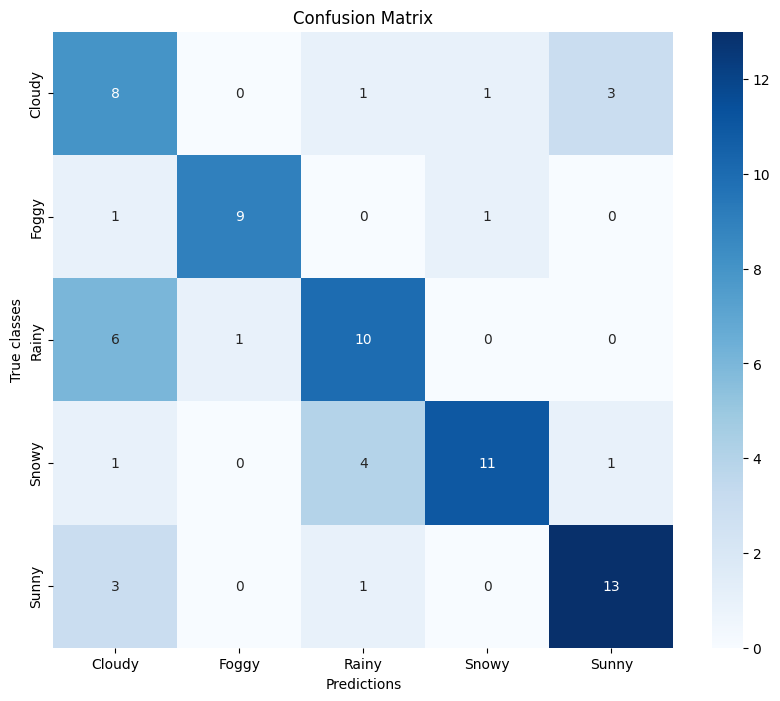

In [ ]:
# Predictions on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converts probabilities into classes
y_true = np.argmax(y_val, axis=1)  # Converts one-hot to original labels

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predictions")
plt.ylabel("True classes")
plt.title("Confusion Matrix")
plt.show()


# Insight : some pictures that are wrongly classified

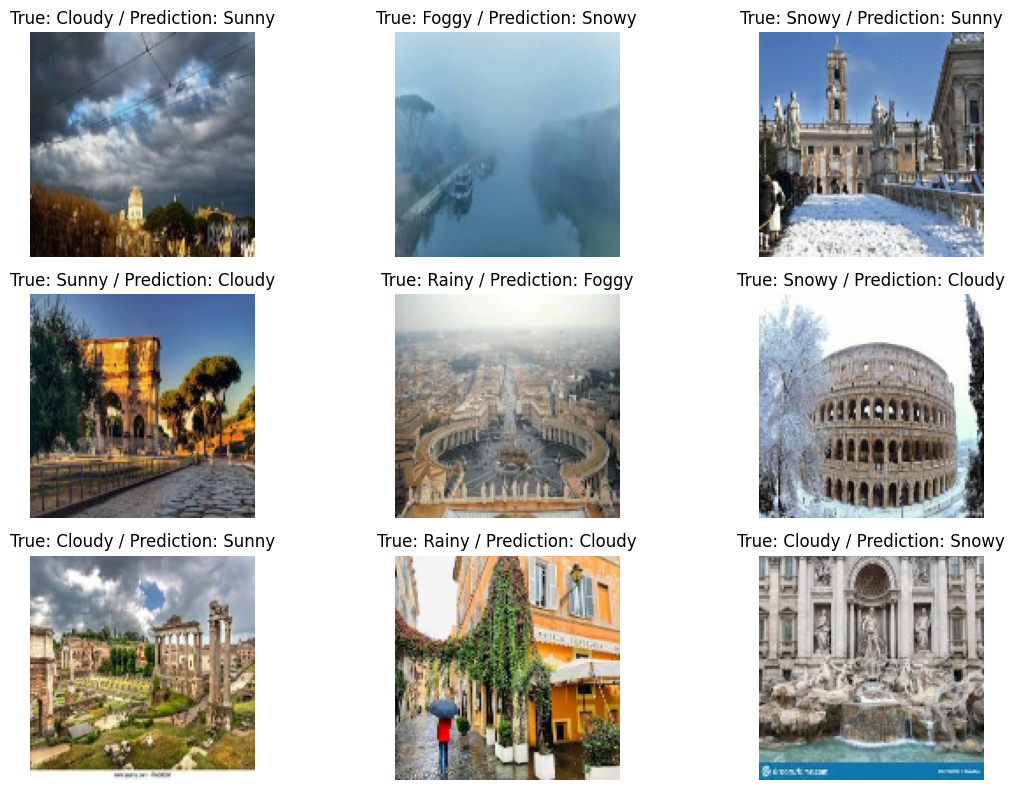

In [ ]:
# We select pictures that were wrongly classified
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# We print some of these pictures as an example
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx])
    plt.title(f"True: {class_names[y_true[idx]]} / Prediction: {class_names[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# General overview : some pictures and their prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step


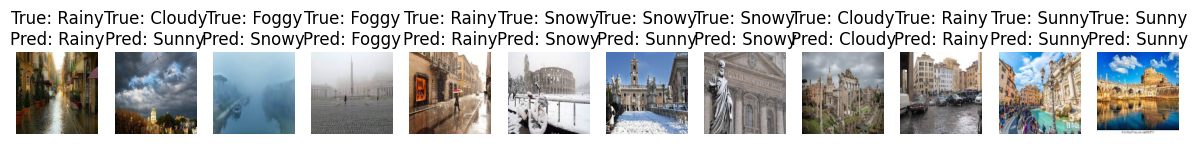

In [ ]:
# Predictions on validation data
predictions = model.predict(X_val)

# We print some pictures and their classification
num_images_to_show = 12
plt.figure(figsize=(15, 10))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(X_val[i])
    true_label = np.argmax(y_val[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}")
    plt.axis('off')

plt.show()
